In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import \
    classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import time

import seaborn as sns
sns.set_style("darkgrid")


In [37]:
data = pd.read_csv("./dataset/agaricus-lepiota.csv")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [39]:
data.drop(['stalk-root'],axis=1,inplace=True) 

In [40]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


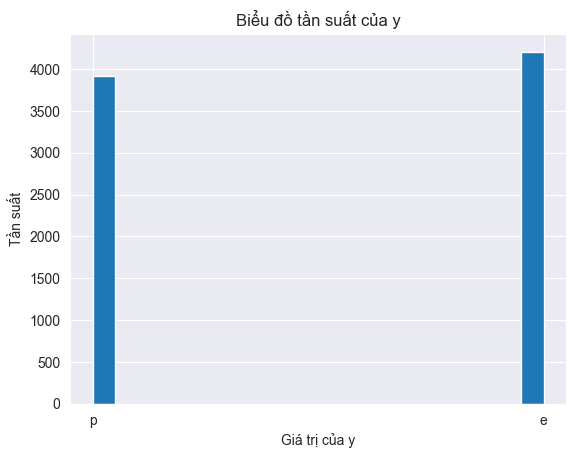

In [41]:
data['class'].hist(bins=20) # bins: số lượng cột của biểu đồ
plt.xlabel("Giá trị của y")
plt.ylabel("Tần suất")
plt.title("Biểu đồ tần suất của y")
plt.show()

In [42]:
data["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [43]:
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

In [44]:
X = data.drop('class', axis=1)
y = data['class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Implemented code

#### P(y) = count(y) / count(Y)

In [47]:
# prior probability
def calculate_prior(y_train):
    prior = {}
    for i in y_train.unique():
        prior[i] = len(y_train[y_train == i]) / len(y_train)
    return prior

#### P(xi|y) = count(xi, y) / count(y)

In [48]:
# conditional probability
def calculate_conditional(X_train, y_train):
    conditional = {}
    for i in y_train.unique():
        conditional[i] = {}
        for j in X_train.columns:
            conditional[i][j] = {}
            unique_values = X_train[j].unique() 
            for k in unique_values:  
                conditional[i][j][k] = len(X_train[(X_train[j] == k) & (y_train == i)]) + 1 / len(y_train[y_train == i]) + len(unique_values)
                
    return conditional

#### S(y) = P(y) * P(x1|y) * P(x2|y) * P(x3|y) ...

In [49]:
def predict(X_test, prior, conditional, y_train):
    y_pred = []
    for i in range(len(X_test)):
        prob = {}
        for j in y_train.unique():
            prob[j] = prior[j]
            for k in X_test.columns:
                    prob[j] *= conditional[j][k][X_test.iloc[i][k]]
                
        y_pred.append(max(prob, key=prob.get))
    return y_pred

In [50]:
start_time = time.time()
prior = calculate_prior(y_train)
conditional = calculate_conditional(X_train, y_train)
y_pred = predict(X_test, prior, conditional, y_train)
end_time = time.time()

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9237079573420837

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1257
           1       1.00      0.84      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.94      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438


Confusion Matrix:
[[1257    0]
 [ 186  995]]


In [52]:
print("Precision lớp 0:", precision_score(y_test, y_pred, pos_label=0))
print("Precision lớp 1:", precision_score(y_test, y_pred, pos_label=1))

Precision lớp 0: 0.8711018711018711
Precision lớp 1: 1.0


### Sklearn

In [53]:
start_time_lib = time.time()
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred_lib = model.predict(X_test)
end_time_lib = time.time()

In [55]:
accuracy = accuracy_score(y_test, y_pred_lib)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lib))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lib))

Accuracy: 0.9524200164068909

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1257
           1       1.00      0.91      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.96      0.95      0.95      2438
weighted avg       0.96      0.95      0.95      2438


Confusion Matrix:
[[1252    5]
 [ 111 1070]]


### So sánh

### Độ chính xác

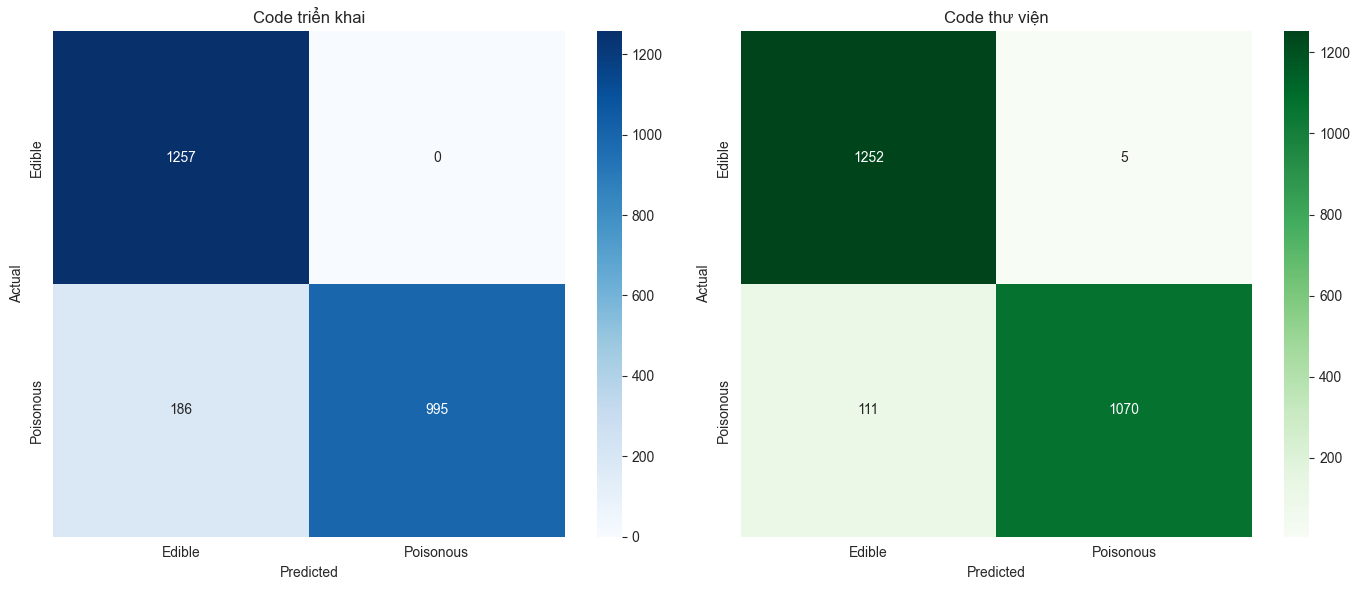

In [56]:
cm1 = confusion_matrix(y_test, y_pred) 
cm2 = confusion_matrix(y_test, y_pred_lib) 

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
axes[0].set_title("Code triển khai")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
axes[1].set_title("Code thư viện")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")


plt.tight_layout() 
plt.show()

#### Running time

In [57]:
print("Thời gian chạy mô hình tự viết:"\
      , end_time - start_time)
print("Thời gian chạy mô hình sử dụng thư viện sklearn:"\
      , end_time_lib - start_time_lib)

Thời gian chạy mô hình tự viết: 5.642090797424316
Thời gian chạy mô hình sử dụng thư viện sklearn: 0.05651497840881348
